<a href="https://colab.research.google.com/github/amitnits2016/fastai/blob/master/5_VehicleClassClassification/5_VehicleClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [6]:
bs=16

In [9]:
path='/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes'

In [3]:
data=ImageDataBunch.from_folder(path, train='train', test='test',valid_pct=0.2)

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:272: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 1761, 3568]), torch.Size([3, 1439, 1941]), torch.Size([3, 3000, 2681]), torch.Size([3, 150, 390]), torch.Size([3, 1172, 1318]), torch.Size([3, 258, 238]), torch.Size([3, 530, 563]), torch.Size([3, 714, 840]), torch.Size([3, 671, 976]), torch.Size([3, 92, 166]), torch.Size([3, 57, 73]), torch.Size([3, 938, 935]), torch.Size([3, 1630, 1816]), torch.Size([3, 390, 605]), torch.Size([3, 2598, 3072]), torch.Size([3, 767, 1451]), torch.Size([3, 264, 257]), torch.Size([3, 825, 829]), torch.Size([3, 393, 1017]), torch.Size([3, 178, 267]), torch.Size([3, 124, 103]), torch.Size([3, 2103, 2577]), torch.Size([3, 1732, 3549]), torch.Size([3, 1867, 2697]), torch.Size([3, 681, 545]), torch.Size([3, 92, 43]), torch.Size([3, 1225, 1607]), torch.Size([3, 143, 155]), torch.Size([3, 156, 588]), torch.Size([3, 1

In [5]:
data.show_batch(rows=3, figsize=(7, 6))

RuntimeError: ignored

In [8]:
data1=ImageDataBunch.from_folder(path, train='train', test='test',valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=bs)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

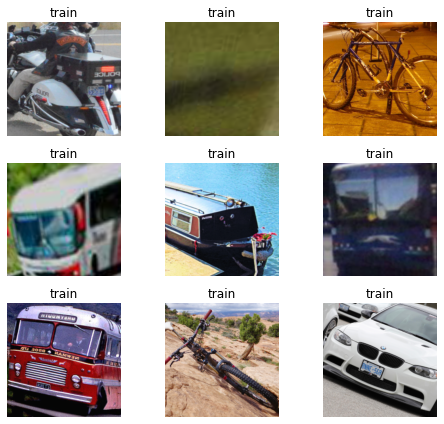

In [10]:
data1.show_batch(rows=3, figsize=(7, 6))

In [11]:
print(data1.c)

1
